596.1850380423209
529.9488803158188
463.7127225893166
397.4765648628152
331.24040713631325
265.0042494098114
198.76809168330936
132.5319339568076
66.29577623030542
0.05961850260744255
[0. 0.]
(array([1.00160064e+03, 3.99360767e-01]), array([[ 0.89478425,  0.44649877],
       [-0.44649877,  0.89478425]]))
1273.4993129169711
1076.9240915645414
895.4774053857511
728.577448067543
575.6424132968609
436.0904947606462
309.3398861458427
194.80878113939042
91.9153734282368
0.07785670025182911
0.05657137610212323
0.050913979519815675
0.04525664542869674
0.03959936443549379
0.033942142322320526
0.02828498226155403
0.022627867486494115
0.01697082452527167
0.011313824438163292
0.005656863205548295
-0.05326474165545317
-0.048286103761021666
-0.04310959438241094
-0.03772171990611747
-0.03210764847564421
-0.02625103277605129
-0.02013380306365662
-0.013735924321231807
-0.007035109914809797
-6.482185438334112e-06
1.7320508075688774
1.5396199628479748
1.347189118127073
1.1547582734061703
0.96232742868526

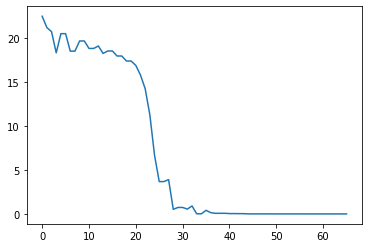

iteration avg: 2.0
Number of evaluations of Function avg: [38, 38, 38, 38, 37]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [1.28030866e-12 9.59232693e-15]
Time avg: 518200.0


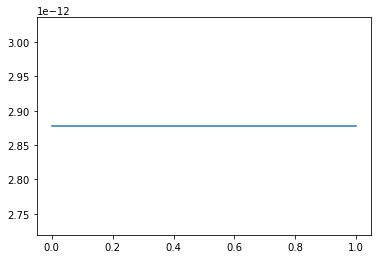

iteration avg: 4.8
Number of evaluations of Function avg: [24, 24, 24, 24, 18]
Number of evaluations of Jacobian avg: [8, 8, 8, 8, 6]
Resutls avg: [-7.44954247e-09 -7.45058093e-09]
Time avg: 1456200.0


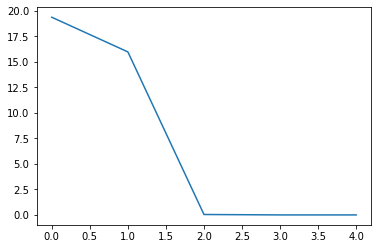

iteration avg: 104.0
Number of evaluations of Function avg: [197, 220, 246, 148, 153]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [0.99998467 0.9999688 ]
Time avg: 3491000.0


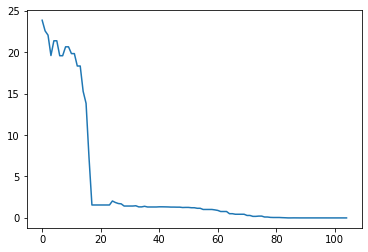

iteration avg: 26.4
Number of evaluations of Function avg: [232, 819, 1086, 614, 1058]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [1. 1.]
Time avg: 8984800.0


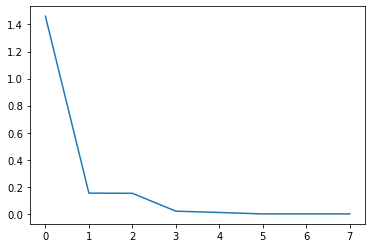

iteration avg: 80.4
Number of evaluations of Function avg: [507, 207, 228, 198, 483]
Number of evaluations of Jacobian avg: [169, 69, 76, 66, 157]
Resutls avg: [0.99999633 0.99999264]
Time avg: 14279800.0


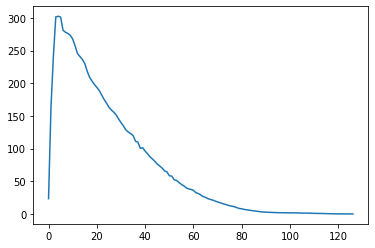

iteration avg: 68.8
Number of evaluations of Function avg: [130, 147, 145, 134, 105]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [-7.06649185e-06  4.46581353e-08]
Time avg: 2833600.0


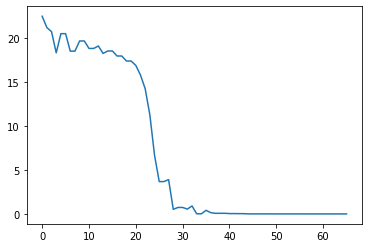

iteration avg: 3.6
Number of evaluations of Function avg: [138, 144, 140, 108, 107]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [-3.80392086e-08 -8.80528566e-12]
Time avg: 1783000.0


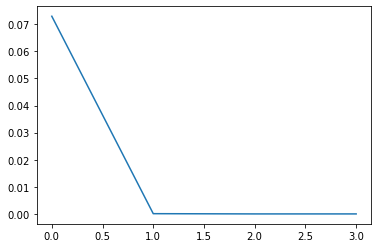

iteration avg: 12.2
Number of evaluations of Function avg: [177, 159, 345, 378, 414]
Number of evaluations of Jacobian avg: [59, 53, 111, 122, 134]
Resutls avg: [-7.49820074e-09 -6.21556936e-09]
Time avg: 11000800.0


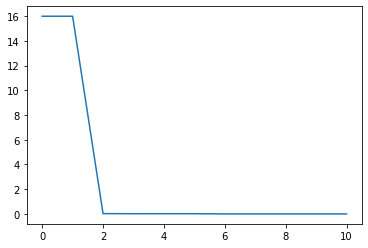

iteration avg: 65.6
Number of evaluations of Function avg: [121, 121, 137, 135, 115]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [0.00018014 0.00017978]
Time avg: 5629800.0


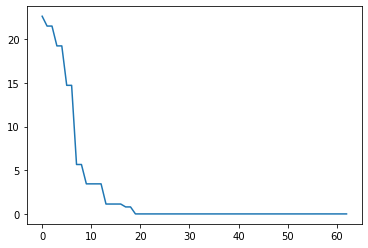

iteration avg: 3.4
Number of evaluations of Function avg: [101, 101, 101, 150, 98]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [0.00019093 0.00019093]
Time avg: 4385000.0


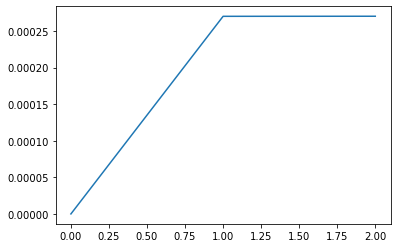

iteration avg: 14.8
Number of evaluations of Function avg: [36, 45, 75, 132, 45]
Number of evaluations of Jacobian avg: [12, 15, 25, 44, 15]
Resutls avg: [0.00019085 0.00019082]
Time avg: 4932600.0


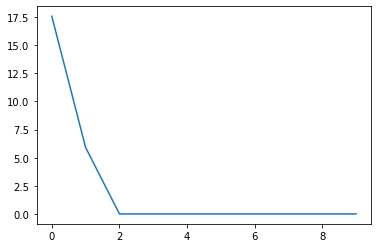

iteration avg: 67.4
Number of evaluations of Function avg: [126, 124, 126, 139, 119]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [ 1.60961916e-08 -1.30511982e-04]
Time avg: 2468000.0


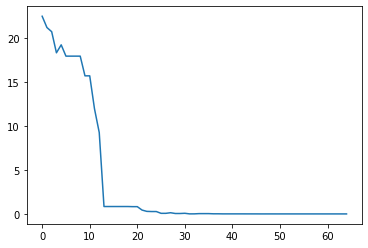

iteration avg: 14.6
Number of evaluations of Function avg: [644, 650, 592, 122, 146]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [ 3.78406433e-13 -4.91470299e-07]
Time avg: 5210200.0


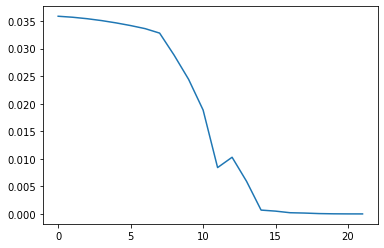

iteration avg: 25.0
Number of evaluations of Function avg: [84, 81, 84, 78, 69]
Number of evaluations of Jacobian avg: [28, 27, 28, 26, 23]
Resutls avg: [-8.98546563e-07  1.07870313e-03]
Time avg: 4031400.0


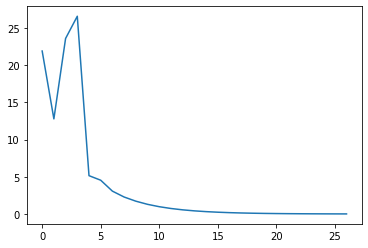

In [47]:
%run Week2.ipynb

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def is_positive_definite(matrix):
    return np.all(np.linalg.eigvals(matrix) > 0)


def trust_region(inputs, f, f_g, f_h, eta, delta, delta_max, max_iteration=1000):
    cur_iter = 0
    x = inputs
    xs = [inputs]
    deltas = [delta]
    while cur_iter < max_iteration:
        gradient = np.array(f_g(inputs))
        hessian = np.array(f_h(inputs))
        if is_positive_definite(hessian):
            if np.linalg.norm(np.linalg.inv(hessian) @ gradient) <= delta:
                p = -np.linalg.inv(hessian) @ gradient
            else:
                p = trust_region_sub_problem(gradient, hessian, 0, delta)
        else:
            p = trust_region_sub_problem(gradient, hessian, -min(np.linalg.eigvals(hessian)), delta)
        rho = (f(x) - f(x + p)) / (-gradient.T @ p - 0.5 * p.T @ hessian @ p)
        if rho < 1 / 4:
            delta = 1 / 4 * delta
        else:
            if rho > 3 / 4 and np.linalg.norm(p) == delta:
                delta = min(2 * delta, delta_max)
        if rho > eta:
            x = x + p
        else:
            break
        xs.append(x)
        deltas.append(delta)
        cur_iter += 1
    return np.array(xs), np.array(deltas), f(x), cur_iter


def cauchy_point(gradient, hessian, delta):
    val = np.transpose(gradient) @ hessian @ gradient
    if val <= 0:
        tau = 1
    else:
        tau = min(1, np.linalg.norm(gradient) ** 3 / (delta * val))
    return -tau * (delta / np.linalg.norm(gradient)) * gradient


def trust_region_sub_problem(gradient, hessian, lambda_0, delta, max_iteration=1000):
    d = np.shape(hessian)[0]
    cur_iter = 0
    eig_val, eig_vec = np.linalg.eig(hessian)
    lambda_1 = min(eig_val)
    min_idx = np.argmin(eig_val)
    lam = lambda_0
    while lam > -lambda_1:
        B = hessian + lambda_0 * np.identity(d)
        if eig_vec[:, min_idx].T @ gradient == 0:
            p = hard_case(gradient, hessian, delta, eig_val, eig_vec, min_idx)
            return p
        else:
            p = np.linalg.inv(B) @ (-gradient)
        R = np.linalg.cholesky(B)
        q = np.linalg.inv(R.T) @ p
        lam_new = lam + (np.linalg.norm(p) / np.linalg.norm(q)) ** 2 * (np.linalg.norm(p) - delta) / delta
        cur_iter += 1
        if lam_new == lam or (cur_iter >= max_iteration and np.linalg.norm(p) <= delta):
            break
        else:
            lam = lam_new
    return p


def hard_case(gradient, hessian, delta, eig_val, eig_vec, min_idx):
    val = np.transpose(gradient) @ hessian @ gradient
    tau = min(1, np.linalg.norm(gradient) ** 3 / (delta * val))
    z = eig_vec[:, min_idx]
    lambda_1 = eig_val[min_idx]
    p = 0
    for i in range(np.shape(eig_val)[0]):
        if eig_val[i] != lambda_1:
            p += ((eig_vec[:, i].T @ gradient) / eig_val[i] - lambda_1) * eig_vec[:, i]
    p += tau * z
    return p

In [50]:
def plot_deltas(deltas, title):
    plt.plot(np.arrange(deltas.shape[0]), deltas)
    plt.xlabel()
    plt.title(title)
    plt.ylabel("delta")
    plt.show()

In [51]:
random_point = generates_random(50, 2, 1)[0]
random_point = np.array(random_point, dtype=float)
print(random_point)

[21. 18.]


In [ ]:
xs, deltas, res, iter_num = trust_region(random_point, f5
                                         , f5_gradient,
                                         f5_hessian, eta=0.2, delta=1, delta_max=10,
                                         max_iteration=1000)